# #Palm Tracker

In [1]:
import cv2
import mediapipe as mp

class HandDetector:
    def __init__(self, mode=False, maxHands=2, detectionCon=0.5, minTrackCon=0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.minTrackCon = minTrackCon

        self.mpHands = mp.solutions.hands
        self.hands = self.mpHands.Hands(static_image_mode=self.mode, max_num_hands=self.maxHands,
                                        min_detection_confidence=self.detectionCon,
                                        min_tracking_confidence=self.minTrackCon)
        self.mpDraw = mp.solutions.drawing_utils
        self.lmList = []
        self.handbox = []

    def take_pic_to_trans(self):
        cap = cv2.VideoCapture(0)
        img_id=-5
        while img_id!=8:
        
            success, img = cap.read()
            #stretch_near = img
            box,hands, img = self.findHands(img) 
            
            if box != [] and box[0]<box[1] and box[2]<box[3] :
                img_id+=1
                if img_id>0:
                    after_box = img[box[2]:box[3],box[0]:box[1]]
                    stretch_near = cv2.resize(after_box, (200, 200),interpolation = cv2.INTER_LINEAR)
                    cv2.imshow("Croopped",stretch_near)
                    grayimg = cv2.cvtColor(stretch_near, cv2.COLOR_BGR2GRAY)
                    equ = cv2.equalizeHist(grayimg)
                    cv2.imshow("Histed",equ)
            cv2.waitKey(1)
        cap.release()
        cv2.destroyAllWindows()
        return equ
        


    def create_data(self,hand_id,img_id,box,img):
        after_box = img[box[2]:box[3],box[0]:box[1]]
        stretch_near = cv2.resize(after_box, (200, 200),interpolation = cv2.INTER_LINEAR)
        cv2.imshow("Croopped",stretch_near)
        grayimg = cv2.cvtColor(stretch_near, cv2.COLOR_BGR2GRAY)
        equ = cv2.equalizeHist(grayimg)
        cv2.imshow("Histed",equ)
        cv2.imwrite(f"{hand_id}/img{img_id}.jpg",equ)
        print(img_id,".jpg")
   
    def findHands(self, img, draw=False, flipType=True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)
        allHands = []
        h, w, c = img.shape
        if self.results.multi_hand_landmarks:
            for handType, handLms in zip(self.results.multi_handedness, self.results.multi_hand_landmarks):
                myHand = {}
                mylmList = []
                xList = []
                yList = []
                for id, lm in enumerate(handLms.landmark):
                    px, py, pz = int(lm.x * w), int(lm.y * h), int(lm.z * w)
                    mylmList.append([px, py, pz])
                    xList.append(px)
                    yList.append(py)
                
                xmin, xmax = min(xList), max(xList)
                ymin, ymax = min(yList), max(yList)
                boxW, boxH = xmax - xmin, ymax - ymin
                bbox = xmin, ymin, boxW, boxH
                self.handbox = xList[17],xList[5], yList[9],yList[0]
                
                
                mage = cv2.line(img, (0,yList[9]), (0,yList[0]), (255,155,0),20)
                
                
                mage = cv2.line(img, (xList[5],0), (xList[17],0), (255,155,155),20)
                if draw:
                    
                    
                    self.mpDraw.draw_landmarks(img, handLms,
                                               self.mpHands.HAND_CONNECTIONS)
                    cv2.rectangle(img, (bbox[0] - 20, bbox[1] - 20),
                                  (bbox[0] + bbox[2] + 20, bbox[1] + bbox[3] + 20),
                                  (255, 0, 255), 2)
                
                    
        return self.handbox,allHands, img



def main(hand_id=None,demo=True):
    cap = cv2.VideoCapture(0)
    detector = HandDetector(detectionCon=0.8, maxHands=2)
    img_id = -4
    while img_id<10:
        
        success, img = cap.read()
        stretch_near = img
        box,hands, img = detector.findHands(img) 
        
        if box != [] and box[0]<box[1] and box[2]<box[3] :
            img_id+=1
            if demo==False and img_id>0:
                detector.create_data(hand_id,img_id,box,img)
    
        img = cv2.flip(img, 1)
        cv2.waitKey(1)
        if img_id=='10':  
            cap.release()
            cv2.destroyAllWindows()
            break
        
        cv2.imshow("Image", img)
if __name__ == "__main__":
    main(hand_id='Sam',demo=False)
    cv2.destroyAllWindows()

1 .jpg
2 .jpg
3 .jpg
4 .jpg
5 .jpg
6 .jpg
7 .jpg
8 .jpg
9 .jpg
10 .jpg


In [161]:
os.getcwd()

'c:\\Users\\Admin\\Desktop\\Dataset'

In [11]:
os.chdir(r'C:\Users\Admin\Desktop\Dataset')

In [12]:
import os
class_name = 'mine'
os.mkdir(class_name)
main(class_name,False)
cv2.destroyAllWindows()


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'mine'

In [13]:
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
        
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [14]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import numpy
import random
from PIL import Image
import PIL.ImageOps  

In [15]:
class SiameseNetworkDataset(Dataset):
    def __init__(self,imageFolderDataset,transform=None):
        self.imageFolderDataset = imageFolderDataset    
        self.transform = transform
        
    def __getitem__(self,index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        #We need to approximately 50% of images to be in the same class
        should_get_same_class = random.randint(0,1) 
        if should_get_same_class:
            while True:
                #Look untill the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs) 
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:

            while True:
                #Look untill a different class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs) 
                if img0_tuple[1] != img1_tuple[1]:
                    break
        print("Heello",img0_tuple)
        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        img0 = img0.convert("L")
        img1 = img1.convert("L")

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        
        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))
    
    def __len__(self):
        return len(self.imageFolderDataset.imgs)

In [16]:
folder_dataset = datasets.ImageFolder(root="C:/Users/Admin/Desktop/Dataset")
# Resize the images and transform to tensors
transformation = transforms.Compose([transforms.Resize((100,100)),
                                     transforms.ToTensor()
                                    ])

# Initialize the network
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transformation)


In [17]:
siamese_dataset[0]

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img4.jpg', 1)


(tensor([[[0.4941, 0.4431, 0.3686,  ..., 0.8314, 0.8118, 0.7922],
          [0.5137, 0.4078, 0.3216,  ..., 0.8235, 0.8078, 0.7804],
          [0.5765, 0.4980, 0.4118,  ..., 0.8078, 0.7882, 0.7608],
          ...,
          [0.5804, 0.5529, 0.5608,  ..., 0.0902, 0.0667, 0.0471],
          [0.5569, 0.5451, 0.5569,  ..., 0.0549, 0.0549, 0.0471],
          [0.5255, 0.5255, 0.5137,  ..., 0.0431, 0.0392, 0.0275]]]),
 tensor([[[0.9059, 0.9059, 0.9294,  ..., 0.9451, 0.9255, 0.9255],
          [0.8863, 0.8941, 0.9216,  ..., 0.9490, 0.9137, 0.9098],
          [0.8824, 0.8824, 0.9059,  ..., 0.9294, 0.8824, 0.8902],
          ...,
          [0.6235, 0.6392, 0.6627,  ..., 0.8510, 0.8627, 0.8745],
          [0.5569, 0.5882, 0.6431,  ..., 0.8392, 0.8431, 0.8510],
          [0.5725, 0.6000, 0.6431,  ..., 0.8196, 0.8000, 0.7882]]]),
 tensor([1.]))

In [18]:
import numpy
np.__version__

'1.21.6'

Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img2.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img5.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img7.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img1.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img3.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img4.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img3.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img5.jpg', 0)


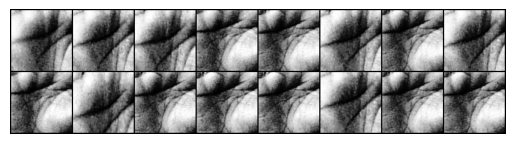

[1. 0. 1. 0. 0. 0. 0. 1.]


In [19]:
# Create a simple dataloader just for simple visualization
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        batch_size=8)

# Extract one batch
example_batch = next(iter(vis_dataloader))

# Example batch is a list containing 2x8 images, indexes 0 and 1, an also the label
# If the label is 1, it means that it is not the same person, label is 0, same person in both images
concatenated = torch.cat((example_batch[0], example_batch[1]),0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

In [20]:
#create the Siamese Neural Network
class SiameseNetwork(nn.Module):

    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Setting up the Sequential of CNN Layers
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11,stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            
            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3,stride=1),
            nn.ReLU(inplace=True)
        )

        # Setting up the Fully Connected Layers
        self.fc1 = nn.Sequential(
            nn.Linear(384, 1024),
            nn.ReLU(inplace=True),
            
            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),
            
            nn.Linear(256,2)
        )
        
    def forward_once(self, x):
        # This function will be called for both images
        # It's output is used to determine the similiarity
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        # In this function we pass in both images and obtain both vectors
        # which are returned
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)

        return output1, output2

In [21]:
# Define the Contrastive Loss Function
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                    (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


        return loss_contrastive

In [22]:
# Load the training dataset
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=64)

In [23]:
net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0005 )

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img4.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img4.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img3.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img4.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img8.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img5.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img3.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img3.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img5.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img4.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img2.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img10.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img1.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img6.jpg', 1)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img6.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img8.jpg', 0)
He

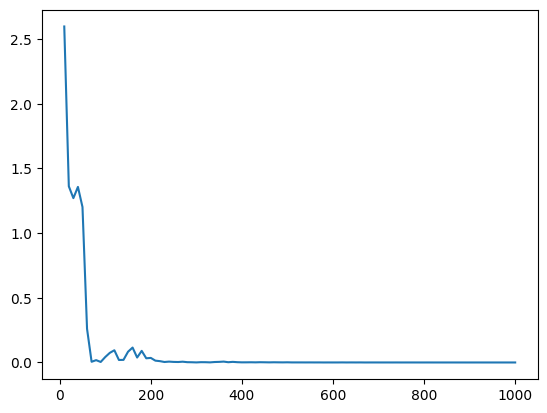

In [24]:
counter = []
loss_history = [] 
iteration_number= 0

# Iterate throught the epochs
for epoch in range(100):

    # Iterate over batches
    for i, (img0, img1, label) in enumerate(train_dataloader, 0):

        # Send the images and labels to CUDA
        img0, img1, label = img0, img1, label

        # Zero the gradients
        optimizer.zero_grad()

        # Pass in the two images into the network and obtain two outputs
        output1, output2 = net(img0, img1)

        # Pass the outputs of the networks and label into the loss function
        loss_contrastive = criterion(output1, output2, label)

        # Calculate the backpropagation
        loss_contrastive.backward()

        # Optimize
        optimizer.step()

        # Every 10 batches print out the loss
        if i % 10 == 0 :
            print(f"Epoch number {epoch}\n Current loss {loss_contrastive.item()}\n")
            iteration_number += 10

            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

show_plot(counter, loss_history)

Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img4.jpg', 0)
Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img3.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


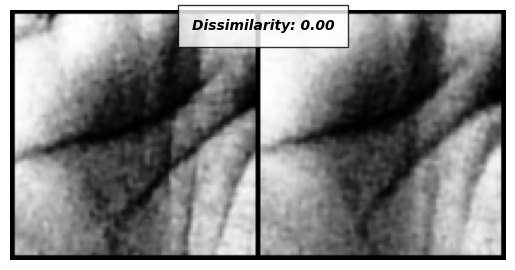

Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img2.jpg', 0)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


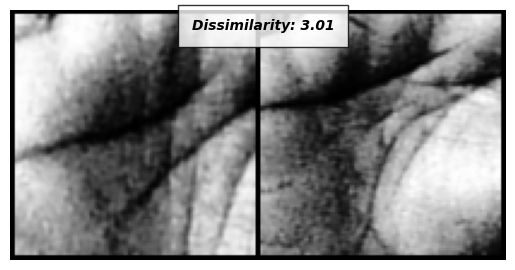

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img5.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


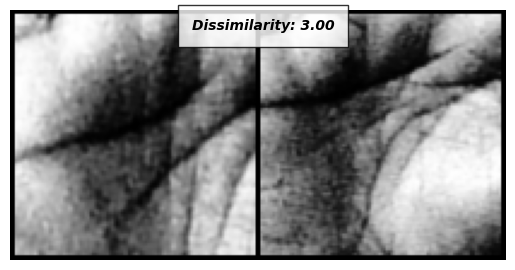

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img5.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


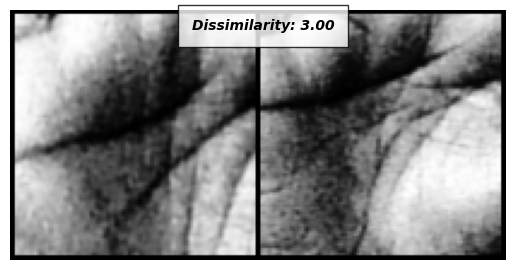

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img7.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


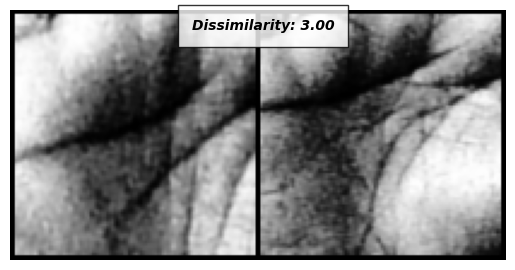

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img6.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


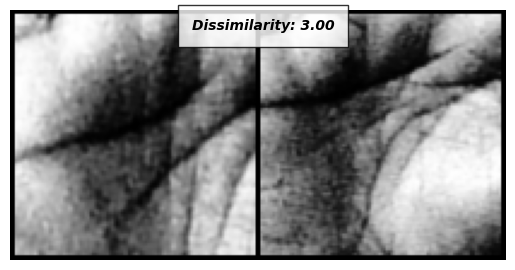

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img7.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


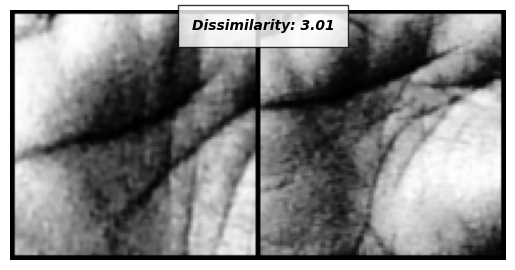

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img3.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


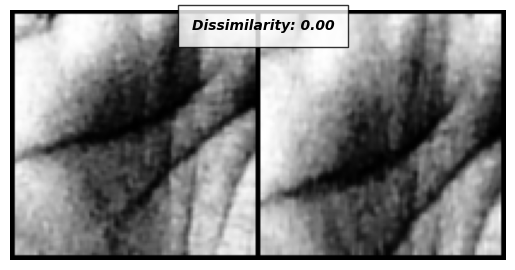

Heello ('C:/Users/Admin/Desktop/Dataset\\mine\\img10.jpg', 1)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


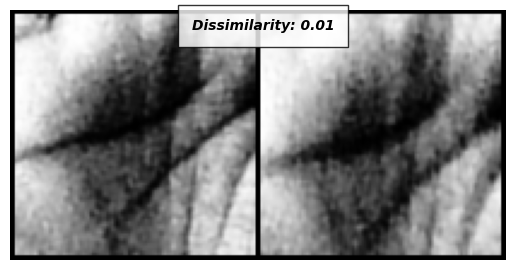

Heello ('C:/Users/Admin/Desktop/Dataset\\another\\img10.jpg', 0)
torch.Size([1, 1, 100, 100]) torch.Size([1, 1, 100, 100])


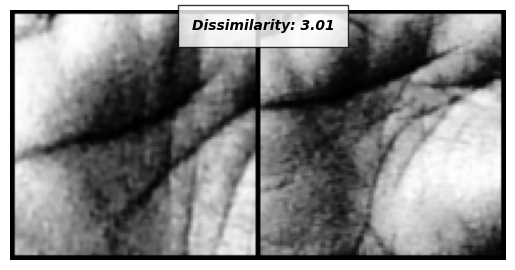

In [26]:
# Locate the test dataset and load it into the SiameseNetworkDataset
folder_dataset_test = datasets.ImageFolder(root="C:/Users/Admin/Desktop/Dataset")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transformation)
test_dataloader = DataLoader(siamese_dataset, num_workers=0, batch_size=1, shuffle=True)

# Grab one image that we are going to test
dataiter = iter(test_dataloader)
x0, _, _ = next(dataiter)

for i in range(10):
    # Iterate over 10 images and test them with the first image (x0)
    _, x1, label2 = next(dataiter)
    print(x0.shape,x1.shape)
    # Concatenate the two images together
    concatenated = torch.cat((x0, x1), 0)
    
    output1, output2 = net(x0, x1)
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

In [33]:
detector1 = HandDetector(detectionCon=0.8, maxHands=2)
detector2 = HandDetector(detectionCon=0.8, maxHands=2)

In [34]:
x0 = Image.fromarray(detector1.take_pic_to_trans())

In [35]:
x1 = Image.fromarray(detector2.take_pic_to_trans())

In [36]:
x0 , x1 = transformation(x0) , transformation(x1)

In [37]:
x0=x0.reshape(1,1,100,100).float()
x1=x1.reshape(1,1,100,100).float()

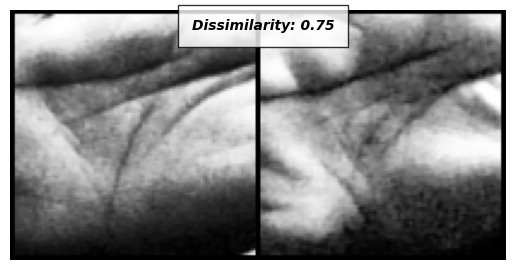

In [39]:
concatenated = torch.cat((x0, x1), 0)
    
output1, output2 = net(x0, x1)
euclidean_distance = F.pairwise_distance(output1, output2)
imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

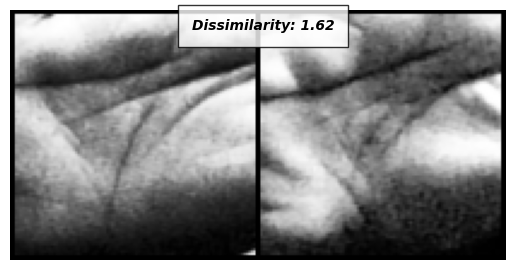

In [40]:
output1, output2 = net(x0,_)
euclidean_distance = F.pairwise_distance(output1, output2)
imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')